In [1]:
!pip install kaggle matplotlib pillow torchvision --quiet


In [2]:
from google.colab import files
files.upload()  # Upload your kaggle.json
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [3]:
!wget http://images.cocodataset.org/zips/train2017.zip

--2025-10-29 13:33:54--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.25.188, 52.217.134.209, 16.15.184.98, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.25.188|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  92.9MB/s    in 3m 29s  

2025-10-29 13:37:23 (88.3 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]



In [4]:
!unzip -qq train2017.zip -d coco-2017

In [7]:
import torchvision.transforms as T

def get_preprocess_pipeline():
    return T.Compose([
        T.Resize((450, 450)),                                 # Resize all images
        T.RandomHorizontalFlip(p=0.5),                        # Flipping
        T.ColorJitter(brightness=0.3, contrast=0.3,
                      saturation=0.4, hue=0.1),               # Contrast, saturation, hue
        T.RandomRotation(degrees=20),                         # Rotation ±20 degrees
        T.RandomApply([T.GaussianBlur(kernel_size=5)], p=0.5),        # Blurring
        T.RandomApply([T.RandomAdjustSharpness(sharpness_factor=2)], p=0.3), # Sharpening
        T.ToTensor(),                                         # Convert to tensor for normalization
        # Already [0,1], additional normalization as needed for your model
        # T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

pipeline = get_preprocess_pipeline()


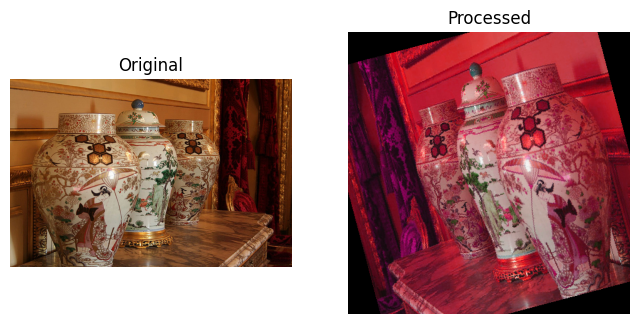

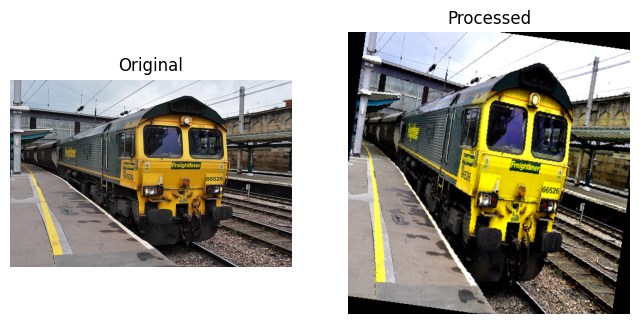

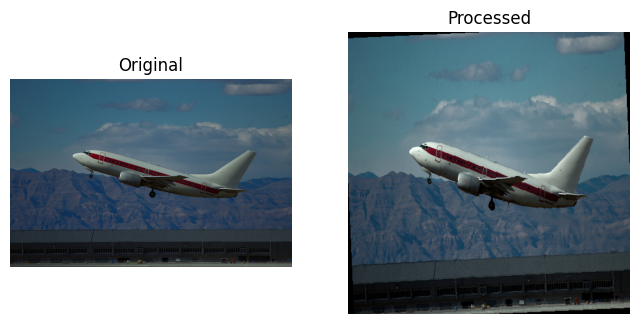

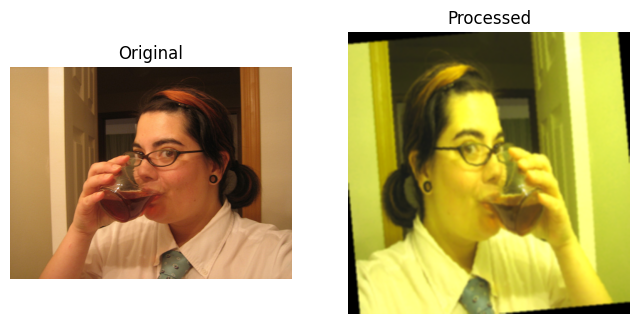

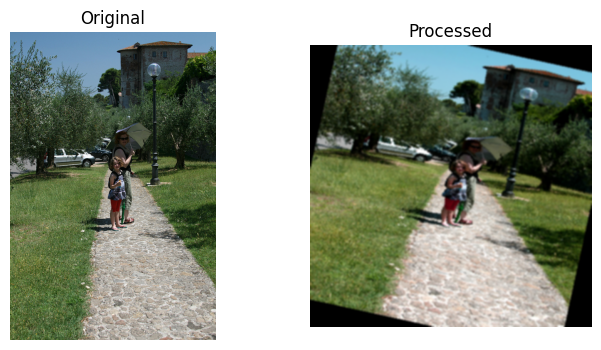

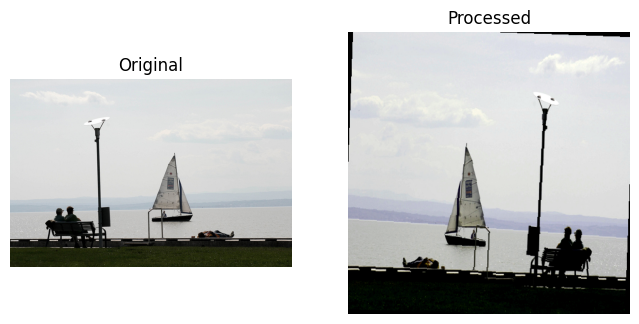

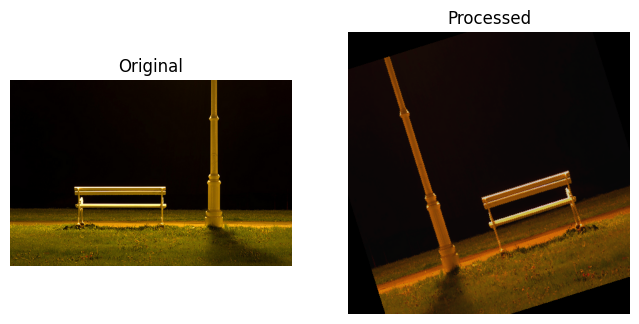

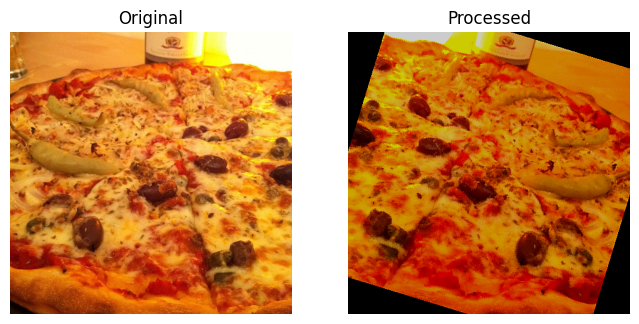

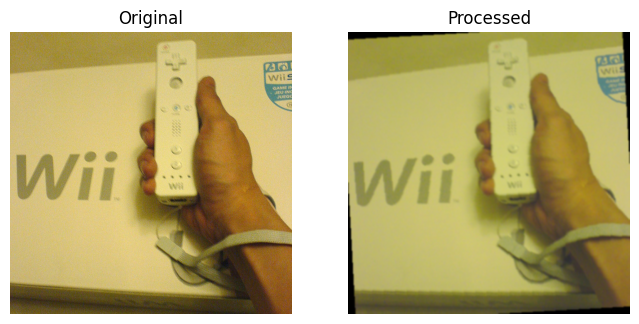

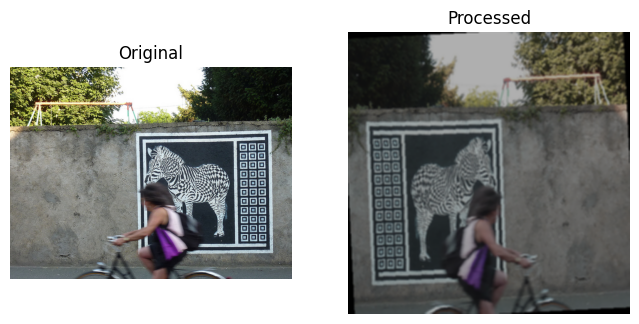

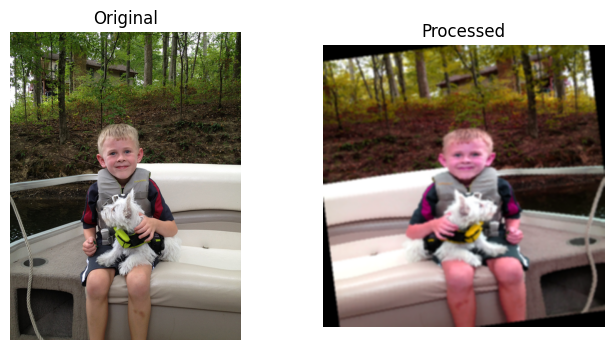

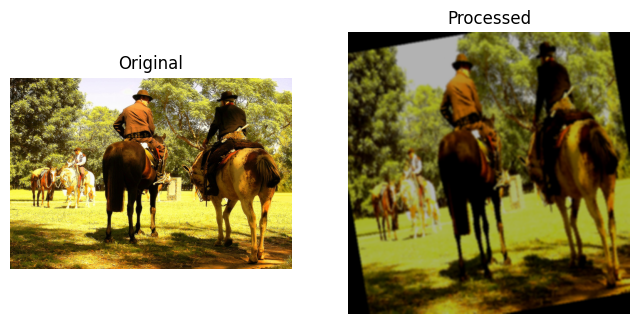

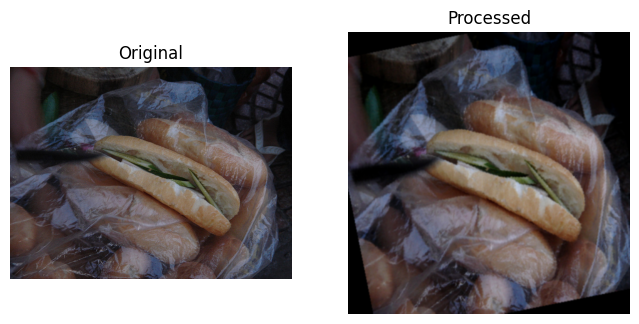

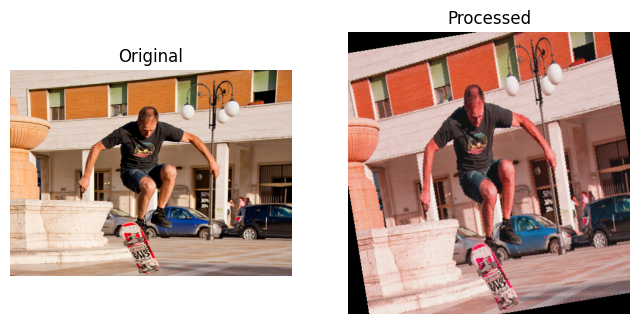

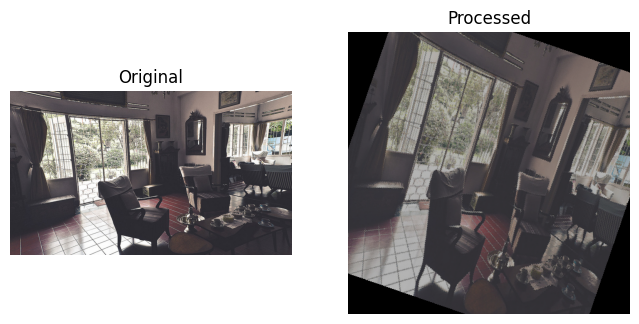

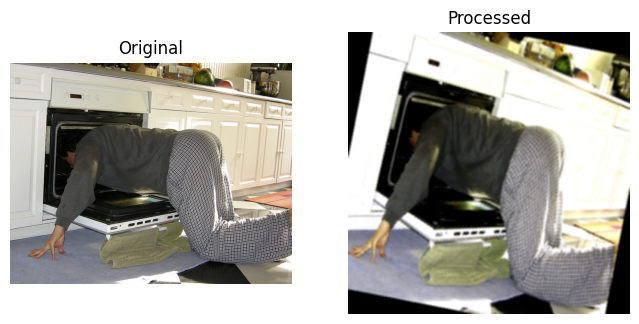

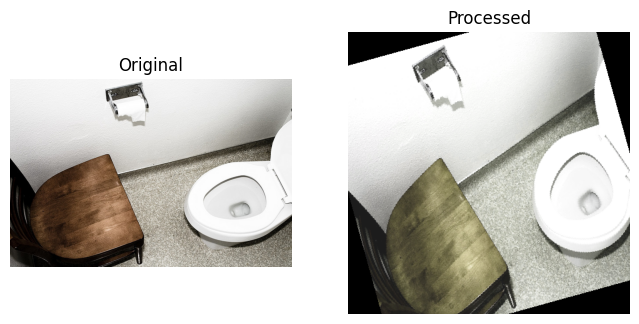

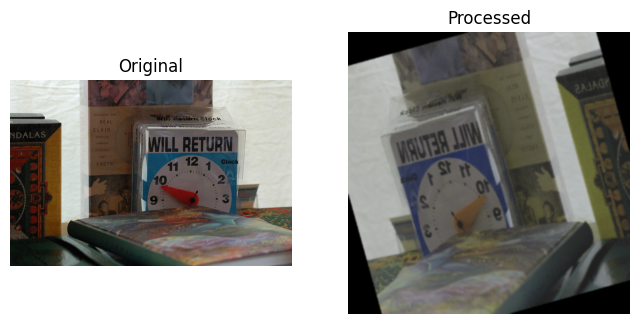

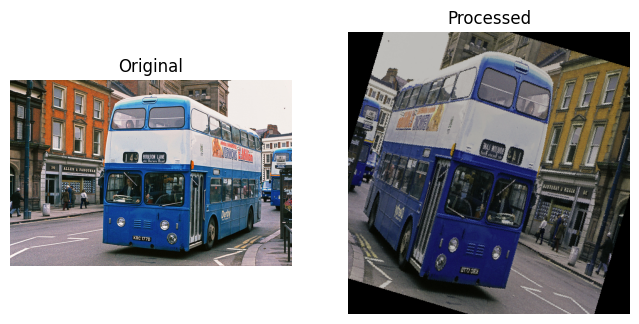

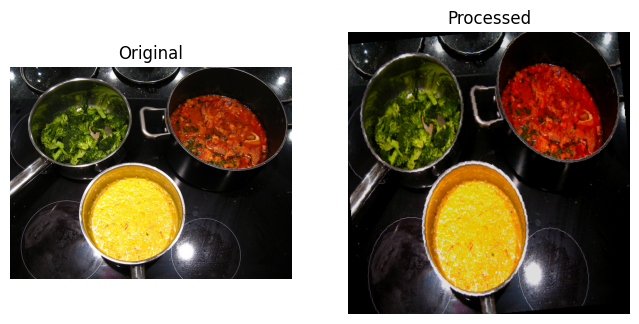

In [8]:
# List all image files
all_images = [fname for fname in os.listdir(IMAGE_DIR) if fname.endswith('.jpg')]
random.seed(20251029)
sample_images = random.sample(all_images, 20)  # 20 random images

for fname in sample_images:
    orig_img = Image.open(os.path.join(IMAGE_DIR, fname)).convert('RGB')
    processed_img = pipeline(orig_img)
    processed_img_np = np.transpose(processed_img.numpy(), (1,2,0))  # CHW to HWC

    # Plot original and processed side-by-side
    fig, ax = plt.subplots(1, 2, figsize=(8,4))
    ax[0].imshow(orig_img)
    ax[0].set_title('Original')
    ax[0].axis('off')

    ax[1].imshow(processed_img_np)
    ax[1].set_title('Processed')
    ax[1].axis('off')

    plt.show()
